## Задание No 4. К разделу 2.
Необходимо:
- Исследовать данные
- построить графики и схемы, позволяющие получить информацию
- визуализировать данные
- обучить модель регрессии или классификации
- оценить качество модели

ссылка на дата сет:
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
ссылка на гит репозеторий:https://github.com/MolodoiUndead/Metrology.git

# Описание данных

**Переменные, характеризующие информацию о деятельности компаний занимающихся туристическим страхованием, базирующихся в Сингапуре**

- `age` - возраст
- `workclass` - рабочий класс
- `fnlwgt` - вес
- `education` - образование 
- `educational-num` - количество лет обучения
- `marital-status` - замужество
- `occupation` - вид жительства
- `relationship` - отношения
- `race` - расса
- `gender` - пол 
- `capital-gain` - сторонний доход 1
- `capital-loss` - сторонний доход 2
- `hours-per-week` - часов в неделю
- `native-country` - страна происхождения


**Целевая переменная:**
- `income` - доход (<=50K и >50K )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyod.models.knn import KNN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score,recall_score, precision_score
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/romanrysin/Downloads/adult.csv')

Выведем общую информацию о дата сете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Выведем списки уникальных значений каждого столбца

In [4]:
def data_info():
    print('Уникальные значения:')
    print()
    for column in df.columns:
        print('* Cтолбец', column," *")
        print(df[column].unique())
        print("----------------------")

In [5]:
data_info()

Уникальные значения:

* Cтолбец age  *
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
----------------------
* Cтолбец workclass  *
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------------------
* Cтолбец fnlwgt  *
[226802  89814 336951 ... 129912 255835 257302]
----------------------
* Cтолбец education  *
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
----------------------
* Cтолбец educational-num  *
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
----------------------
* Cтолбец marital-status  *
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-s

Рассмотрим статистические данные

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Посмотрим на случайные строки 

In [7]:
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7638,41,Private,190786,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,40,United-States,>50K
39376,45,Self-emp-not-inc,77132,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K
15514,25,Private,176864,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
37531,32,Local-gov,209900,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,65,United-States,>50K
4837,19,Private,73257,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,15,Germany,<=50K
7209,39,Private,167882,12th,8,Never-married,Other-service,Unmarried,Black,Female,0,0,48,Haiti,<=50K
29853,46,Private,192768,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
28927,28,Private,216814,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,<=50K
12991,39,Private,34996,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K
47858,66,?,357750,11th,7,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,<=50K


## Предобработка данных

Столбцы `education` и `education-num` повторяют друг друга в разном формате, удалим первый

In [8]:
df = df.drop(['education'],axis=1)

In [9]:
print('Количество положительных статусов в дата сете:',df[df['income']=='>50K']['income'].count())

Количество положительных статусов в дата сете: 11687


Проверим дупликаты.

In [10]:
df.duplicated().sum()

52

Удалим их

In [11]:
df = df.drop_duplicates().reset_index(drop = True)

Проверка количественных переменных на Мультиколлинеарность

In [12]:
df = df.replace('<=50K',0)
df = df.replace('>50K',1)

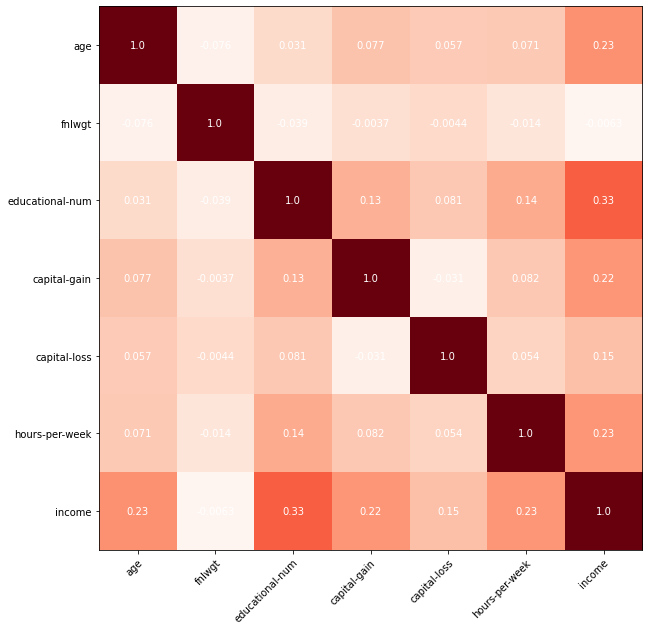

In [13]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks(np.arange(len(corr.index)))
ax.set_yticks(np.arange(len(corr.index)))

ax.set_xticklabels(corr.index)
ax.set_yticklabels(corr.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

data = corr.values

for i in range(len(corr.index)):
    for j in range(len(corr.index)):
        text = ax.text(j, i, '{:.2}'.format(data[i, j]),
                       ha="center", va="center", color="w")
        
im = ax.imshow(corr.corr(), cmap='Reds')

Построим гистограммы количественных переменных

In [14]:
def hist(column,b,a,n):
    plt.figure(figsize=(15,7))
    sns.despine(left=True)
    sns.histplot(df[column],bins=b, label=column,color="red")
    plt.xlim([a, n])
    plt.legend(loc='upper right')
    plt.title('Гистограмма '+column)
    plt.show()

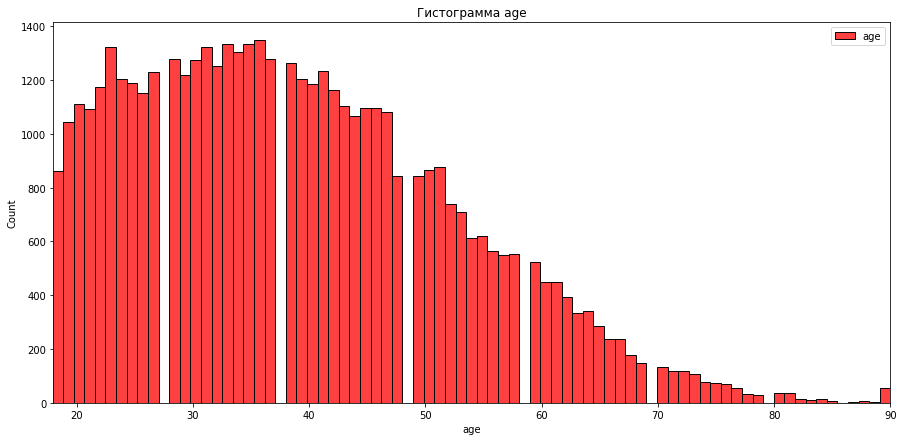

In [15]:
hist('age',80,18,90)

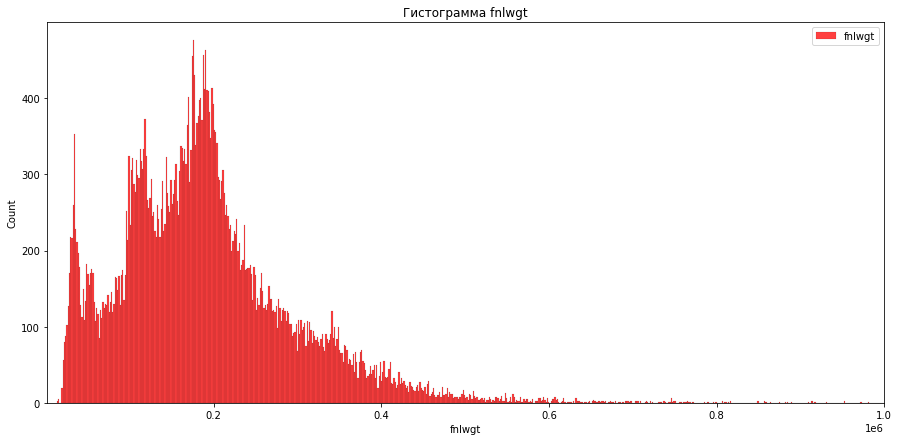

In [16]:
hist('fnlwgt',1000,1000,1000000)

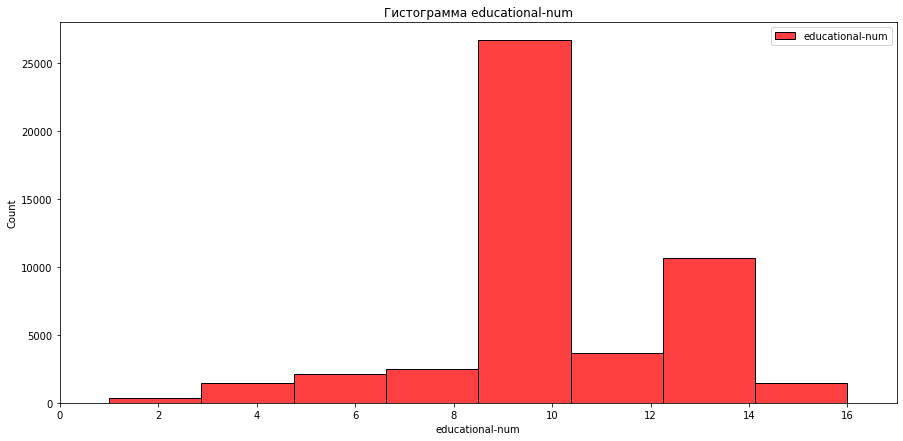

In [17]:
hist('educational-num',8,0,17)

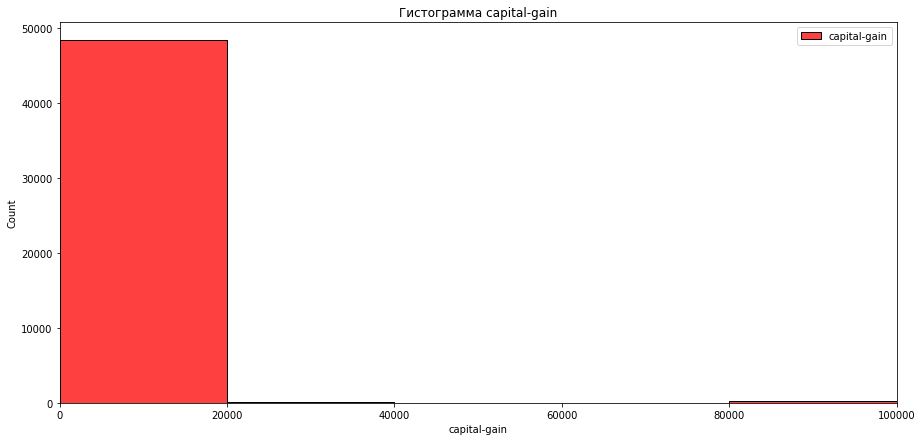

In [18]:
hist('capital-gain',5,0,100000)

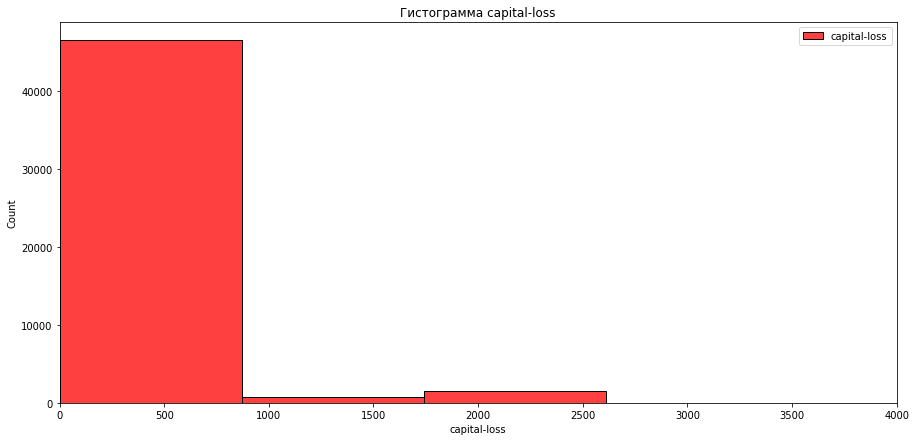

In [19]:
hist('capital-loss',5,0,4000)

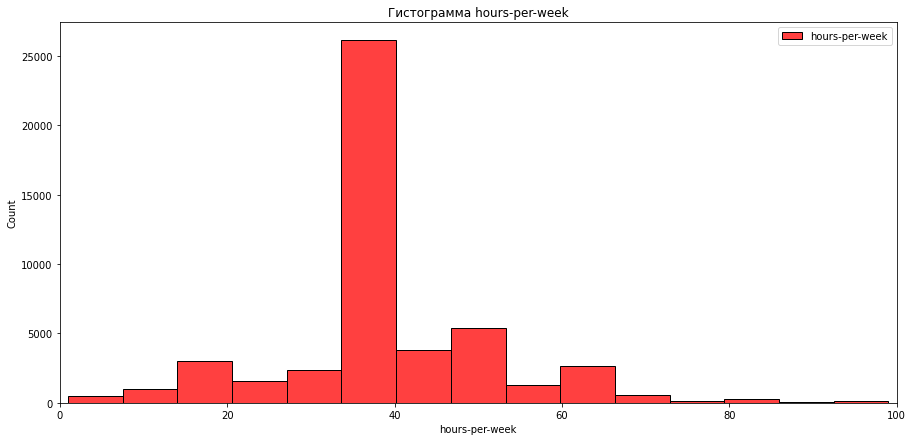

In [20]:
hist('hours-per-week',15,0,100)

Изходя из полученных гистограмм, выбросов особо не наблюдается.

Отделим таргет

In [21]:
features = df.drop('income', axis=1)
target = df['income']

Проведем кодировку категориальных переменных.

In [22]:
encoder = OrdinalEncoder()
features_numeric = features[['fnlwgt','educational-num','capital-gain','capital-loss','age','hours-per-week']]
features_0 = features.drop(['fnlwgt','educational-num','capital-gain','capital-loss','age','hours-per-week'] , axis=1)
features_0 = pd.DataFrame(encoder.fit_transform(features_0), columns=features_0.columns)
features = features_0.join(features_numeric)

Разделим дата сет на обучающий и тестовый

In [23]:
features_train, features_test, target_train, target_test = train_test_split(features,target,  test_size=0.2,
                                                                          random_state=12345)

Балансировака классов 

In [24]:
classes = np.unique(target_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train)
class_weights = dict(zip(classes, weights))

## Обучение и тестирование модели

In [25]:
best_model = None
best_result = 0

for est in range(20, 90, 10):
    for depth in range(1, 10, 2):
        modelz = CatBoostClassifier(verbose=False,random_state=12345, n_estimators=est, max_depth=depth,class_weights=class_weights)
        modelz.fit(features_train,target_train)
        target_predict = modelz.predict(features_test)
        result = f1_score(target_predict, target_test)
        if result > best_result:
            best_model = modelz
            best_result = result
            best_est = est
            best_depth = depth

fpr, tpr, thresholds = roc_curve(target_test, best_model.predict_proba(features_test)[:, 1])
target_predict = pd.Series(best_model.predict(features_test))

print("F1 наилучшей модели на тестовой выборке:", best_result, "Количество деревьев:", best_est, "Глубина:", best_depth)
print("AUC-ROC =", roc_auc_score(target_test,best_model.predict_proba(features_test)[:, 1]))

F1 наилучшей модели на тестовой выборке: 0.7170603674540682 Количество деревьев: 70 Глубина: 5
AUC-ROC = 0.9295775772133652


## Результативность модели

Посмотрим осноынве метрики, а также построим график зависимости доли истинно положительных ответов от доли ложноположительных ответов (метрика AUC-ROC - площадь под графиком от 0 до 1). Также выведем матрицу ошибок, для лучшей визуализации обучения.

In [26]:
def plot(fpr, tpr): 
    plt.figure() 
    plt.plot([0, 1], [0, 1], linestyle='--') 
    plt.plot(fpr, tpr) 
    plt.ylim([0.0, 1.0]) 
    plt.xlim([0.0, 1.0]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('ROC-кривая модели') 
    plt.show()

F1-score:  0.7170603674540682 (среднее гармоническое полноты и точности)
Полнота:  0.8715440238196512 (доля TP среди TP+FN)
Точность:  0.6090963139120095 (доля TP среди TP+FP)
AUC-ROC:  0.9295775772133652
Accuracy:  0.8342898134863702


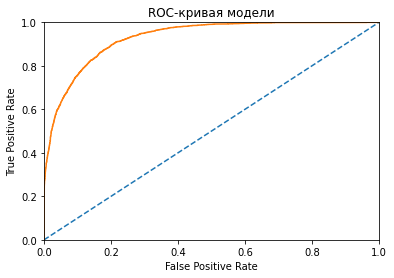

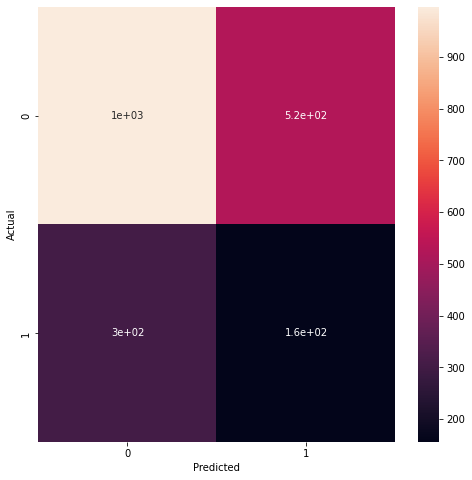

In [27]:
fpr, tpr, thresholds = roc_curve(target_test, best_model.predict_proba(features_test)[:,1])
print("F1-score: ", f1_score(target_test, target_predict), "(среднее гармоническое полноты и точности)")
print("Полнота: ", recall_score(target_test, target_predict), "(доля TP среди TP+FN)")
print("Точность: ", precision_score(target_test, target_predict), "(доля TP среди TP+FP)")
print("AUC-ROC: ", roc_auc_score(target_test, best_model.predict_proba(features_test)[:,1]))
print("Accuracy: ", best_model.score(features_test,target_test))
plot(fpr, tpr)


confusion_matrix = pd.crosstab(target_test, target_predict, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, ax=ax)
plt.show()

In [28]:
def chart_feature_imp(model,string=' '):
    feature_imp = pd.Series(model.feature_importances_, index=features_test.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков'+string)

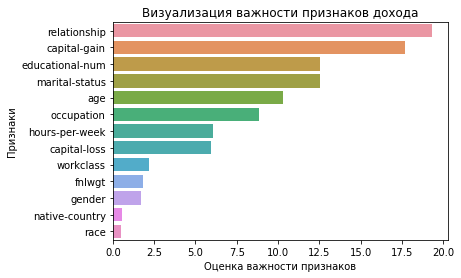

In [29]:
chart_feature_imp(best_model,' дохода')

## Вывод

Полученная модель имеет хороший показатель верных предстказаний для учебной модели (83%). Так же метрики Полноты и точности указывают хорошую долю получения положительного класса. Наиболее важные для обучения модели метрики - "отношения","сторонний доход" и "количество лет обучения"